<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Recommender System: EDA</strong></h1>

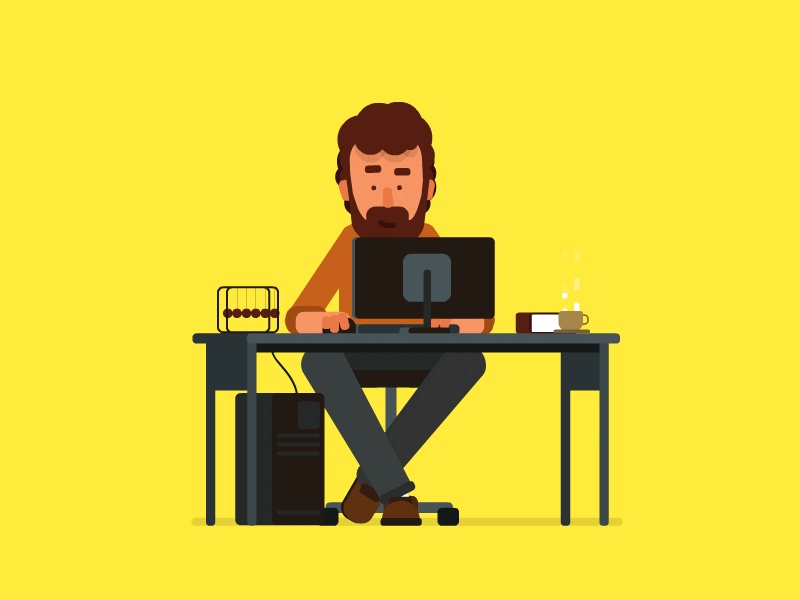

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1)

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data Information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Processing](#2.2)

> - 2.2.1 [Drop duplicate](#2.2.1) 
> - 2.2.2 [Rename columns](#2.2.2)
> - 2.2.3 [Drop columns](#2.2.3)
> - 2.2.4 [Detect the values 0 in Rating dataframe](#2.2.4)

2.3 [Check missing values](#2.3)

> - 2.3.1 [Detect missing values](#2.3.1)
> - 2.3.2 [Impute missing values](#2.3.2)
> - 2.3.3 [Delete missing values](#2.3.3)

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Split the location column](#2.6)

2.7 [Check the content](#2.7)

2.8 [Change data type](#2.8)

2.9 [Descriptive statistics for Central Tendency](#2.9)

2.10 [Age Range](#2.10)

2.11 [Merge column](#2.11)
> - 2.11.1 [Merge book and rating](#2.11.1)
> - 2.11.2 [Merge user and rating](#2.11.2)
> - 2.11.3 [Merge user_with_rating and book_with_rating](#2.11.3)

2.12 [Reduce Dimension](#2.12)

2.13 [Save the Intermediate data](#2.13)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Distribution of Rating](#3.1)

3.2 [How old are the users?](#3.2)

3.3 [The 10 country having the highest amount of users](#3.3)

3.4 [When did these books were published](#3.4)

3.5 [Average rating and number of ratings of the most popular books](#3.5)

3.6 [Average rating and number of ratings of the most popular authors](#3.6)

<br>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
    This notebook is a practical introduction to the main Recommender System techniques. The objective of a RecSys is to recommend relevant items for users, based on their preference. Preference and relevance are subjective, and they are generally inferred by items users have consumed previously.  
The main families of methods for RecSys are:  
</p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li><span style="color:#122ecc;">Collaborative Filtering </span>: This method makes automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on a set of items, A is more likely to have B's opinion for a given item than that of a randomly chosen person. </li>
    <li> <span style="color:#122ecc;">Content-Based Filtering </span>:  This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.</li>
    <li><span style="color:#122ecc;">Hybrid methods </span>: Recent research has demonstrated that a hybrid approach, combining collaborative filtering and content-based filtering could be more effective than pure approaches in some cases. These methods can also be used to overcome some of the common problems in recommender systems such as cold start and the sparsity problem.</li>

</ul>

********

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> A Basic Recommender System using Content-based, Collaborative Filtering and Hybrid methods </li>
    <li> Factors influence on the recommendation </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Book_Rating </span> is often given?</li>
    <li>Which <span style="color:#122ecc;">Book-Title </span> get the highest rating?</li>
    <li>Which <span style="color:#122ecc;">Country </span> have the highest number of users?</li>
    <li>Which <span style="color:#122ecc;">Age </span> have the highest number of users?</li>
    <li>Is the dataset surfered the <span style="color:#122ecc;">long-tail problem </span>? (I will explain later)</li>
</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install recmetrics
!{sys.executable} -m pip -q install dython


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import math
#recmetrics is for plotting the long tail problem
import recmetrics
#Determining the correlation between features
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

#This is is for Correlation test
from scipy.stats import spearmanr
#This is is for Mann-Whitney Testing
import scipy.stats as stats

# Modules for data visualization
import seaborn as sns
# overwrite the style of all the matplotlib graphs
sns.set()
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

import EDAfunctions as f #This one is for functions in plotting

In [2]:
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.2
Python 3.9.12


<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***

## articles_df Dataset
*****

In [4]:
## Importing the datasets
articles_df = pd.read_csv("Data/shared_articles.csv", delimiter=',', skipinitialspace = True)

articles_df.columns = articles_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(articles_df.shape))

# drop Unnamed, it is just a number given to identify each house
articles_df.head(3)

The shape of the ORGINAL data is (row, column): (3122, 13)


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en


## users_interactions Dataset
*****

In [5]:
## Importing the datasets
interactions_df = pd.read_csv("Data/users_interactions.csv", delimiter=',', skipinitialspace = True)

interactions_df.columns = interactions_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(interactions_df.shape))

# drop Unnamed, it is just a number given to identify each house
interactions_df.head(3)

The shape of the ORGINAL data is (row, column): (72312, 8)


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
Let's take a look in three dataset.
> **articles_df Dataset**

In [6]:
print ("The shape of the data is (row, column):"+ str(articles_df.shape))
print (articles_df.info())

The shape of the data is (row, column):(3122, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 3122 with some of the missing values

> **users_interactions Dataset**

In [7]:
print ("The shape of the data is (row, column):"+ str(interactions_df.shape))
print (interactions_df.info())

The shape of the data is (row, column):(72312, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    72312 non-null  int64 
 1   eventType    72312 non-null  object
 2   contentId    72312 non-null  int64 
 3   personId     72312 non-null  int64 
 4   sessionId    72312 non-null  int64 
 5   userAgent    56918 non-null  object
 6   userRegion   56907 non-null  object
 7   userCountry  56918 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 72312 with some of the missing values

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>



<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***

In this section, we load the [Deskdrop dataset](https://www.kaggle.com/gspmoreira/articles-sharing-reading-from-cit-deskdrop), which contains a real sample of 12 months logs (Mar. 2016 - Feb. 2017) from CI&T's Internal Communication platform (DeskDrop). It contains about 73k logged users interactions on more than 3k public articles shared in the platform.
It is composed of two CSV files:  
- **shared_articles.csv**
- **users_interactions.csv**

Take a look in this kernels for a better picture of the dataset: 
- Deskdrop datasets EDA 
- DeskDrop Articles Topic Modeling
*****
## shared_articles.csv

Contains information about the articles shared in the platform. Each article has its sharing date (timestamp), the original url, title, content in plain text, the article' lang (Portuguese: pt or English: en) and information about the user who shared the article (author).

There are two possible event types at a given timestamp: 
- CONTENT SHARED: The article was shared in the platform and is available for users. 
- CONTENT REMOVED: The article was removed from the platform and not available for further recommendation.

For the sake of simplicity, we only consider here the "CONTENT SHARED" event type, assuming (naively) that all articles were available during the whole one year period. For a more precise evaluation (and higher accuracy), only articles that were available at a given time should be recommended, but we let this exercice for you.
*****
## users_interactions.csv

Contains logs of user interactions on shared articles. It can be joined to **articles_shared.csv** by **contentId** column.

The eventType values are:  
- **VIEW**: The user has opened the article. 
- **LIKE**: The user has liked the article. 
- **COMMENT CREATED**: The user created a comment in the article. 
- **FOLLOW**: The user chose to be notified on any new comment in the article. 
- **BOOKMARK**: The user has bookmarked the article for easy return in the future.

<a id="2.2"></a>
# ✂️ 2.2 Data Processing
***

<a id="2.2.1"></a>
## ❌ 2.2.1 Drop duplicate
****
## articles_df dataset

In [8]:

print ("The shape of the data set before dropping duplicated:"+ str(articles_df.shape))

articles_df = articles_df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(articles_df.shape))

The shape of the data set before dropping duplicated:(3122, 13)
The shape of the data set after dropping duplicated:(3122, 13)


## users_interactions dataset

In [9]:

print ("The shape of the data set before dropping duplicated:"+ str(interactions_df.shape))

interactions_df = interactions_df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(interactions_df.shape))

The shape of the data set before dropping duplicated:(72312, 8)
The shape of the data set after dropping duplicated:(72301, 8)


<a id="2.2.2"></a>
## 🔭 2.2.2 Data munging
****
As there are different interactions types, we associate them with a weight or strength, assuming that, for example, a comment in an article indicates a higher interest of the user on the item than a like, or than a simple view.

In [10]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 3.0, 
   'FOLLOW': 4.0,
   'COMMENT CREATED': 5.0,  
}

interactions_df['eventStrength'] = interactions_df['eventType'].apply(lambda x: event_type_strength[x])

<a id="2.2.3"></a>
## 🔦 2.2.3 Select users with at least 5 interactions
****
Recommender systems have a problem known as ***user cold-start***, in which is hard do provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.  
For this reason, we are keeping in the dataset only users with at least 5 interactions.

In [11]:
users_interactions_count_df = interactions_df.groupby(['personId', 'contentId']).size().groupby('personId').size()
print('# users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['personId']]
print('# users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# users: 1895
# users with at least 5 interactions: 1140


In [12]:
print('# of interactions: %d' % len(interactions_df))
interactions_from_selected_users_df = interactions_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'personId',
               right_on = 'personId')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 72301
# of interactions from users with at least 5 interactions: 69857


<a id="2.2.4"></a>
## 🔦 2.2.4 Smooth user preference
****
In Deskdrop, users are allowed to view an article many times, and interact with them in different ways (eg. like or comment). Thus, to model the user interest on a given article, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.

In [13]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df \
                    .groupby(['personId', 'contentId'])['eventStrength'].sum() \
                    .apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(10)

# of unique user/item interactions: 39106


,personId,contentId,eventStrength
0,-9223121837663643404,-8949113594875411859,1.000000
1,-9223121837663643404,-8377626164558006982,1.000000
2,-9223121837663643404,-8208801367848627943,1.000000
3,-9223121837663643404,-8187220755213888616,1.000000
4,-9223121837663643404,-7423191370472335463,3.169925
5,-9223121837663643404,-7331393944609614247,1.000000
6,-9223121837663643404,-6872546942144599345,1.000000
7,-9223121837663643404,-6728844082024523434,1.000000
8,-9223121837663643404,-6590819806697898649,1.000000
9,-9223121837663643404,-6558712014192834002,1.584963


<a id="2.3"></a>
# 👀 2.3 Check missing values 
***

<a id="2.3.1"></a>
## 🔎 2.3.1 Detect missing values 
****

> **Sample articles_df Dataset**

Missing values in the user dataframe in descending: 
                  Total  Percent
authorUserAgent   2442    78.22
authorRegion      2442    78.22
authorCountry     2442    78.22


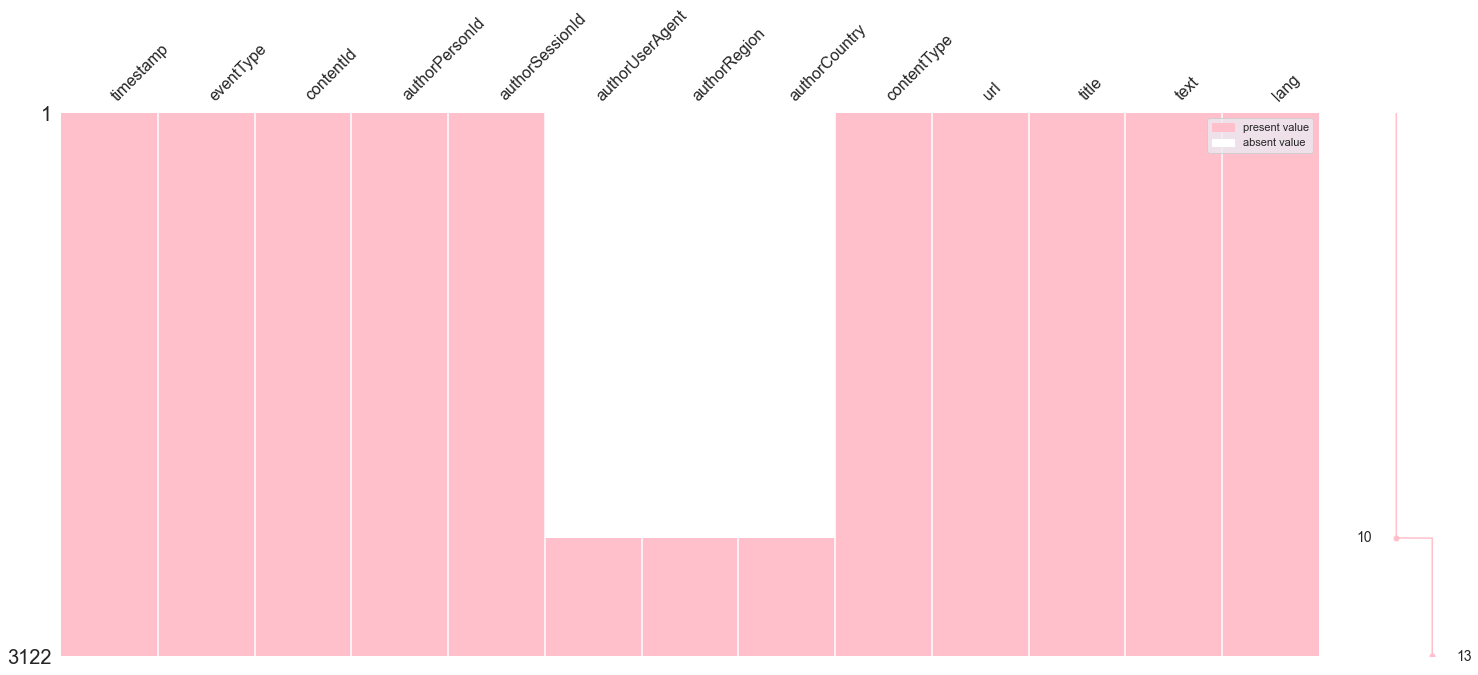

In [14]:
f.draw_missing_plot(articles_df)

### ------------> OBSERVATION
***
The amount of missing values of `authorUserAgent`, `authorRegion` and `authorCountry` column is considerable, I still want query to find the most appropriate values for them before dropping

> **Sample interactions_df Dataset**

Missing values in the user dataframe in descending: 
              Total  Percent
userRegion   15405    21.31
userAgent    15394    21.29
userCountry  15394    21.29


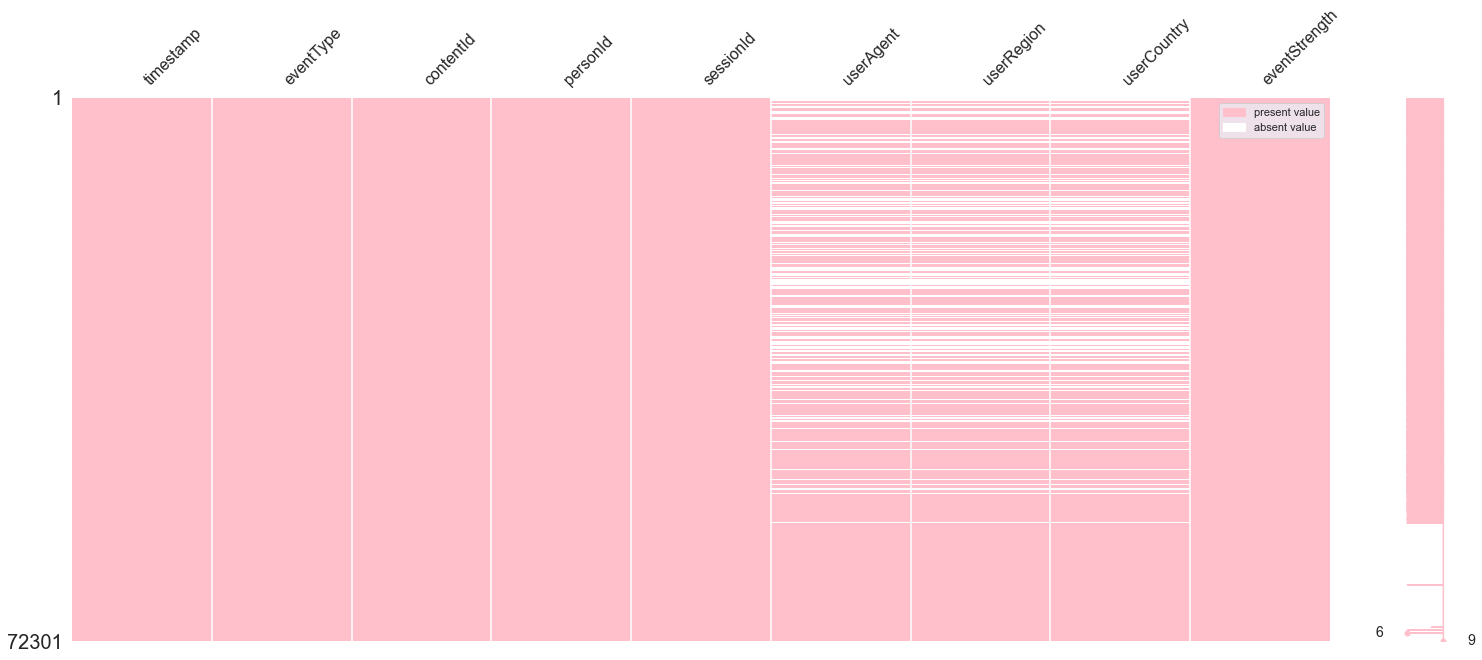

In [15]:
f.draw_missing_plot(interactions_df)

### ------------> OBSERVATION
***
The amount of missing values of `userRegion`, `userAgent` and `userCountry` column is considerable, I still want query to find the most appropriate values for them before dropping

<a id="2.3.2"></a>
## 🔎 2.3.2 Dealing missing values 
****

> **Sample articles_df Dataset**

All of the missing data is in the `authorUserAgent`, `authorRegion`, `authorCountry`, `url` I do not really care those information so I want to drop them

In [16]:
articles_df = articles_df.drop(columns=['authorUserAgent', 'authorRegion', 'authorCountry', 'url'])


> **Sample interactions_df Dataset**

I do not care about the `userAgent` so I want to drop it. `userCountry` since the missing percentage is small so I want to fill them with the mode. `userRegion` is filled with the mode of group by `userCountry`

In [17]:
interactions_df = interactions_df.drop(columns=['userAgent'])

In [18]:
interactions_df['userCountry'] = interactions_df['userCountry'].fillna(interactions_df['userCountry'].mode()[0])

In [19]:
interactions_df['userRegion'] = interactions_df.groupby(['userCountry'], sort=False)['userRegion'].apply(lambda x: x.ffill().bfill())

<a id="2.4"></a>
# 💭 2.4 Upper Case the content
****

> **Sample articles_df Dataset**

In [20]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
articles_df = articles_df.applymap(lambda s: s.upper() if type(s) == str else s)
articles_df.head(3)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,contentType,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,HTML,"ETHEREUM, A VIRTUAL CURRENCY, ENABLES TRANSACT...",ALL OF THIS WORK IS STILL VERY EARLY. THE FIRS...,EN
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,HTML,"ETHEREUM, A VIRTUAL CURRENCY, ENABLES TRANSACT...",ALL OF THIS WORK IS STILL VERY EARLY. THE FIRS...,EN
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,HTML,BITCOIN FUTURE: WHEN GBPCOIN OF BRANSON WINS O...,THE ALARM CLOCK WAKES ME AT 8:00 WITH STREAM O...,EN


> **Sample interactions_df Dataset**

In [21]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
interactions_df = interactions_df.applymap(lambda s: s.upper() if type(s) == str else s)
interactions_df.head(3)

,timestamp,eventType,contentId,personId,sessionId,userRegion,userCountry,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,MG,BR,1.0
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,NY,US,1.0
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,MG,BR,1.0


<a id="2.5"></a>
# 📚 2.5 Convert data types:
***

In [22]:
interactions_df['eventStrength'] = interactions_df['eventStrength'].astype('int')
interactions_df['eventType'] = interactions_df['eventType'].astype('string')
interactions_df['userRegion'] = interactions_df['userRegion'].astype('string')
interactions_df['userCountry'] = interactions_df['userCountry'].astype('string')

<a id="2.6"></a>
# 📚 2.6 Extra-whitespaces:
***

> **Sample articles_df Dataset**

In [23]:
f.whitespace_remover(articles_df)

> **Sample interactions_df Dataset**

In [24]:
f.whitespace_remover(interactions_df)

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

<a id="3.1"></a>
# 3.1 Overall look on the correlation between variable

<a id="3.1.1"></a>
## 3.1.1 Correlation of the `articles_df`

<a id="3.1.1.A"></a>
## 3.1.1.A Heatmap

In [25]:
categorical_features=identify_nominal_columns(articles_df)
categorical_features

['eventType', 'contentType', 'title', 'text', 'lang']

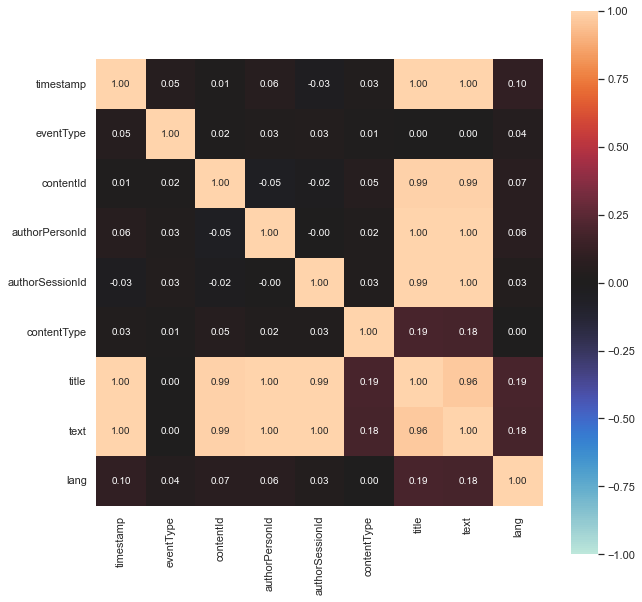

In [26]:
complete_correlation= associations(articles_df, filename= 'complete_correlation.png', figsize=(10,10))

<a id="3.1.1.B"></a>
## 3.1.1.B Data Distribution for hypothesis testing

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

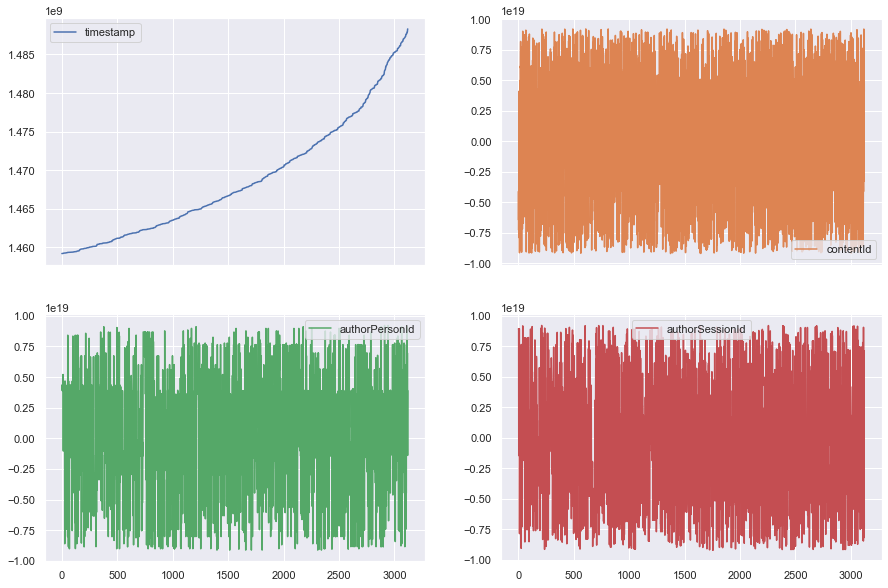

In [27]:
plt.rcParams["figure.figsize"]= 15,10

articles_df.plot(subplots=True, layout=(2,2))

### ---------> OBSERVATION
****
Since there are no normal distribution so we cannot use the Pearson Correlation HeatMap. Since then, we use the Spearman’s rho method to test

<a id="3.1.1.C"></a>
## 3.1.1.C Correlation hypothesis testing

## Question 1: What is the correlation between `timestamp` and `title`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `timestamp` and `title` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `timestamp` and `title` are not correlated.

**Significance level** = 0.05

In [43]:
stats.spearmanr(articles_df['timestamp'], articles_df['title'])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

### ---------> OBSERVATION
****
The column `timestamp` and `title` are strongly correlated because: 
> - The Spearman’s rho correlation score is: 0.9999. 
> - P-values (0.0) is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## Question 2: What is the correlation between `timestamp` and `text`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `timestamp` and `text` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `timestamp` and `text` are not correlated.

**Significance level** = 0.05

In [48]:
stats.spearmanr(articles_df['timestamp'], articles_df['text'])

SpearmanrResult(correlation=-0.011725734327028904, pvalue=0.5125103063914485)

### ---------> OBSERVATION
****
The column `timestamp` and `text` are strongly correlated because: 
> - The Spearman’s rho correlation score is: -0.011. 
> - P-values (0.512) is higher than the ***Significant level*** so we ***reject the null hypothesis***.

## Question 3: What is the correlation between `contentId` and `title`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `contentId` and `title` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `contentId` and `title` are not correlated.

**Significance level** = 0.05

In [49]:
stats.spearmanr(articles_df['contentId'], articles_df['title'])

SpearmanrResult(correlation=0.015058130779690985, pvalue=0.4003021658992636)

### ---------> OBSERVATION
****
The column `timestamp` and `text` are strongly correlated because: 
> - The Spearman’s rho correlation score is: -0.011. 
> - P-values (0.512) is higher than the ***Significant level*** so we ***reject the null hypothesis***.

In [29]:
stop

NameError: name 'stop' is not defined

<a id="3.1.1"></a>
## 3.1.1 Correlation of the `interactions_df`

In [ ]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(interactions_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(interactions_df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

In [ ]:
articles_df